## Tiền xử lý dữ liệu tập tin Diemthi_thpt_quocgia_2016.xlsx
- Tập dữ liệu chứa điểm thi THPT Quốc Gia năm 2016 của gần 35.000 thí sinh. Điểm thi là chuỗi bao gồm môn thi và điểm. <b>Ví dụ:
 "Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00"</b>
- Đọc tập tin Diemthi_thpt_quocgia_2016.xlsx và xem các thông tin cơ bản
### Yêu cầu:
- Kiểm tra dữ liệu bị trùng
- Kiểm tra bị trùng số báo danh 
- Xử lý phân tích biến chuỗi DIEM_THI thành các biến môn thi và điểm
- Cho biết điểm trung bình môn Toán theo mỗi cụm thi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('data/Diemthi_thpt_quocgia_2016.xlsx')

In [3]:
df.shape

(34826, 6)

In [4]:
df.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34826 entries, 0 to 34825
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SOBAODANH   34826 non-null  object
 1   HO_TEN      34826 non-null  object
 2   NGAY_SINH   34826 non-null  object
 3   TEN_CUMTHI  34826 non-null  object
 4   GIOI_TINH   34826 non-null  object
 5   DIEM_THI    34826 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [6]:
df.duplicated().any()

False

In [7]:
df.duplicated(subset=['SOBAODANH']).any()

False

In [8]:
df['GIOI_TINH'].value_counts()

Nữ     17833
Nam    16993
Name: GIOI_TINH, dtype: int64

In [9]:
df['TEN_CUMTHI'].value_counts()

Trường Đại học Công nghiệp Tp. HCM    14410
Sở GDĐT Bắc Giang                     10730
Sở GDĐT Hoà Bình                       6029
Sở GDĐT Thừa Thiên -Huế                3657
Name: TEN_CUMTHI, dtype: int64

In [10]:
chuoi = df.iloc[0, -1] # điểm của thí sinh đầu tiên
chuoi

'Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00'

In [13]:
lst = chuoi.split(' '*2)
lst

['Toán:',
 ' 2.00',
 ' Ngữ văn:',
 ' 5.50',
 ' Lịch sử:',
 ' 3.00',
 ' Địa lí:',
 ' 5.00']

In [14]:
for item in lst:
    if ':' in item:
        print('Môn:', item)
    else:
        print('Điểm:', item)

Môn: Toán:
Điểm:  2.00
Môn:  Ngữ văn:
Điểm:  5.50
Môn:  Lịch sử:
Điểm:  3.00
Môn:  Địa lí:
Điểm:  5.00


In [15]:
lst_mon = []
lst_diem = []
for item in lst:
    if(':' in item):
        lst_mon.append(item.strip(' :'))
    else:
        lst_diem.append(float(item))
df_ = pd.DataFrame({'mon':lst_mon, 'diem':lst_diem})
df_

,mon,diem
0,Toán,2.0
1,Ngữ văn,5.5
2,Lịch sử,3.0
3,Địa lí,5.0


In [16]:
def tach_diem(chuoi):
    lst = chuoi.split(' '*2)
    lst_mon = []
    lst_diem = []
    for item in lst:
        if(':' in item):
            lst_mon.append(item.strip(' :'))
        else:
            lst_diem.append(float(item))
    return pd.DataFrame({'mon':lst_mon, 'diem':lst_diem})

In [2]:
chuoi = df.iloc[0, -1] # điểm của thí sinh đầu tiên
df_ = tach_diem(chuoi)
df_

NameError: name 'df' is not defined

In [18]:
l_sobaodanh, l_mon, l_diem = [], [], []
for idx, row in df.iterrows():
    chuoi = row['DIEM_THI']
    df_ = tach_diem(chuoi)
    for i in range(df_.shape[0]):
        l_sobaodanh.append(row['SOBAODANH'])
        l_mon.append(df_.loc[i, 'mon'])
        l_diem.append(df_.loc[i, 'diem'])
df_diem = pd.DataFrame({'SOBAODANH':l_sobaodanh, 'MON':l_mon, 'DIEM':l_diem})        

In [19]:
df_diem.shape

(145874, 3)

In [20]:
df_diem.head(10)

,SOBAODANH,MON,DIEM
0,018000001,Toán,2.00
1,018000001,Ngữ văn,5.50
2,018000001,Lịch sử,3.00
3,018000001,Địa lí,5.00
4,018000002,Toán,5.50
5,018000002,Ngữ văn,5.25
6,018000002,Địa lí,5.50
7,018000002,Tiếng Anh,3.68
8,018000003,Toán,4.50
9,018000003,Ngữ văn,5.50


In [21]:
df.loc[df['SOBAODANH']=='018000002', 'DIEM_THI'].values

array(['Toán:   5.50   Ngữ văn:   5.25   Địa lí:   5.50   Tiếng Anh:   3.68'],
      dtype=object)

In [22]:
df_diem[df_diem['SOBAODANH']=='018000002']

,SOBAODANH,MON,DIEM
4,018000002,Toán,5.50
5,018000002,Ngữ văn,5.25
6,018000002,Địa lí,5.50
7,018000002,Tiếng Anh,3.68


In [23]:
df_diem_pivot = df_diem.pivot(index='SOBAODANH', columns='MON', values='DIEM').reset_index()

In [24]:
df_diem_pivot.shape

(34826, 13)

In [25]:
df_diem_pivot.head()

MON,SOBAODANH,Hóa học,Lịch sử,Ngữ văn,Sinh học,Tiếng Anh,Tiếng Nhật,Tiếng Pháp,Tiếng Trung,Tiếng Đức,Toán,Vật lí,Địa lí
0,018000001,NaN,3.0,5.50,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,5.00
1,018000002,NaN,NaN,5.25,NaN,3.68,NaN,NaN,NaN,NaN,5.50,NaN,5.50
2,018000003,NaN,NaN,5.50,NaN,2.25,NaN,NaN,NaN,NaN,4.50,NaN,3.75
3,018000004,NaN,NaN,6.00,NaN,1.50,NaN,NaN,NaN,NaN,3.00,NaN,5.50
4,018000005,NaN,NaN,4.75,NaN,2.00,NaN,NaN,NaN,NaN,2.25,NaN,5.25


In [ ]:
df_diem_pivot.info()

In [26]:
df_ = pd.merge(df, df_diem_pivot)

In [27]:
df_.shape

(34826, 18)

In [28]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34826 entries, 0 to 34825
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SOBAODANH    34826 non-null  object 
 1   HO_TEN       34826 non-null  object 
 2   NGAY_SINH    34826 non-null  object 
 3   TEN_CUMTHI   34826 non-null  object 
 4   GIOI_TINH    34826 non-null  object 
 5   DIEM_THI     34826 non-null  object 
 6   Hóa học      8098 non-null   float64
 7   Lịch sử      3235 non-null   float64
 8   Ngữ văn      33894 non-null  float64
 9   Sinh học     3573 non-null   float64
 10  Tiếng Anh    30200 non-null  float64
 11  Tiếng Nhật   8 non-null      float64
 12  Tiếng Pháp   10 non-null     float64
 13  Tiếng Trung  27 non-null     float64
 14  Tiếng Đức    1 non-null      float64
 15  Toán         34500 non-null  float64
 16  Vật lí       10157 non-null  float64
 17  Địa lí       22171 non-null  float64
dtypes: float64(12), object(6)
memory usage: 5.0+ M

In [29]:
df_.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI,Hóa học,Lịch sử,Ngữ văn,Sinh học,Tiếng Anh,Tiếng Nhật,Tiếng Pháp,Tiếng Trung,Tiếng Đức,Toán,Vật lí,Địa lí
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....,NaN,3.0,5.50,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,5.00
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...,NaN,NaN,5.25,NaN,3.68,NaN,NaN,NaN,NaN,5.50,NaN,5.50
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...,NaN,NaN,5.50,NaN,2.25,NaN,NaN,NaN,NaN,4.50,NaN,3.75
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...,NaN,NaN,6.00,NaN,1.50,NaN,NaN,NaN,NaN,3.00,NaN,5.50
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...,NaN,NaN,4.75,NaN,2.00,NaN,NaN,NaN,NaN,2.25,NaN,5.25


In [30]:
df_.groupby('TEN_CUMTHI')['Toán'].mean().sort_values(ascending=False)

TEN_CUMTHI
Trường Đại học Công nghiệp Tp. HCM    4.994128
Sở GDĐT Thừa Thiên -Huế               3.923577
Sở GDĐT Bắc Giang                     3.914950
Sở GDĐT Hoà Bình                      3.190559
Name: Toán, dtype: float64

In [31]:
df_['Toán'].describe()

count    34500.000000
mean         4.230152
std          1.534198
min          0.000000
25%          3.000000
50%          4.250000
75%          5.250000
max          9.750000
Name: Toán, dtype: float64

In [32]:
df_.groupby('TEN_CUMTHI')['Toán'].describe()

,count,mean,std,min,25%,50%,75%,max
TEN_CUMTHI,,,,,,,,
Sở GDĐT Bắc Giang,10726.0,3.914950,1.246907,0.0,3.00,4.00,4.75,8.00
Sở GDĐT Hoà Bình,6027.0,3.190559,1.164065,0.0,2.25,3.25,4.00,6.50
Sở GDĐT Thừa Thiên -Huế,3654.0,3.923577,1.057442,0.5,3.25,4.00,4.75,6.75
Trường Đại học Công nghiệp Tp. HCM,14093.0,4.994128,1.601184,0.0,4.00,5.25,6.25,9.75


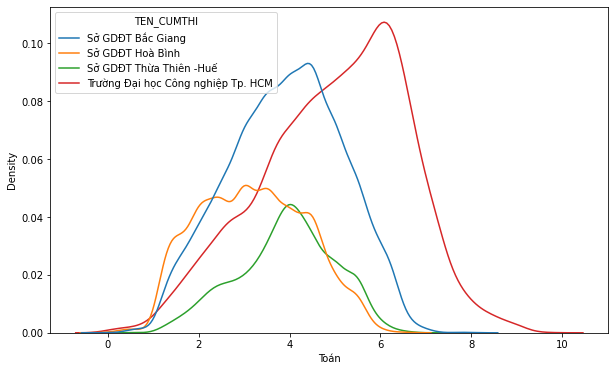

In [34]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df_, x='Toán', hue='TEN_CUMTHI')
plt.show()

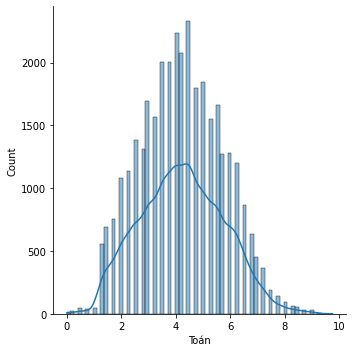

In [37]:
sns.displot(data=df_, x='Toán', kde=True)
plt.show()

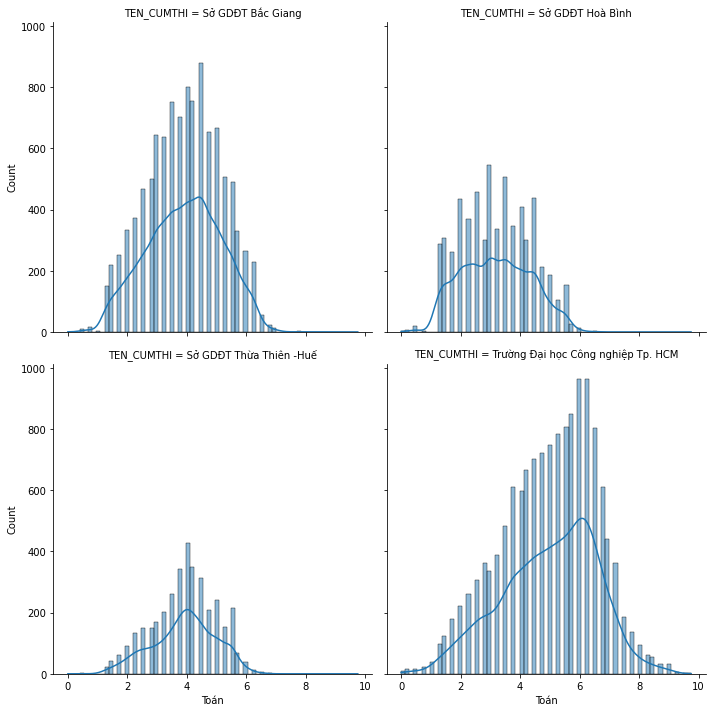

In [39]:
sns.displot(data=df_, x='Toán', kde=True, col='TEN_CUMTHI', col_wrap=2)
plt.show()